In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')
%matplotlib inline

In [23]:
name = 'Esc2'
df = gpd.read_file('../data/interim/shapes/AP_Geotermica_' + name + '.shp')
df = df[df.geometry.notnull()].to_crs({'init': 'epsg:4326'}) 
print (len(df))

96


In [24]:
df.head()

,ID_N,CVE,NOMBRE,LONGITUD,LATITUD,TEMP,ENER_MIN,CAP_MIN,GEN_MIN,EMICO2_MIN,...,GEN_MED,EMICO2_MED,ENER_MAX,CAP_MAX,GEN_MAX,EMICO2_MAX,NOM_MUN,NOM_ENT,OC,geometry
0,1.0,1.0,Chiapas,-92.16,15.00,194.0,1.536950e+11,4.058584,32.019792,14.536985,...,64.039583,29.073971,4.610850e+11,12.175752,96.059375,43.610956,Cacahoatán,Chiapas,Cacahoatán (C),POINT (-92.16 15)
1,2.0,2.0,Chiapas,-92.08,15.06,159.0,6.252000e+10,1.650949,13.025000,5.913350,...,26.050000,11.826700,1.875600e+11,4.952848,39.075000,17.740050,Unión Juárez,Chiapas,Unión Juárez (C),POINT (-92.08 15.06)
2,3.0,3.0,Chiapas,-92.45,15.16,153.0,4.689000e+10,1.238212,9.768750,4.435013,...,19.537500,8.870025,1.406700e+11,3.714636,29.306250,13.305037,Huixtla,Chiapas,El Retiro (C),POINT (-92.45 15.16)
3,4.0,4.0,Chiapas,-92.20,15.20,194.0,1.536950e+11,4.058584,32.019792,14.536985,...,64.039583,29.073971,4.610850e+11,12.175752,96.059375,43.610956,Tapachula,Chiapas,Toquian (C),POINT (-92.2 15.2)
4,5.0,5.0,Chiapas,-92.33,15.31,194.0,1.536950e+11,4.058584,32.019792,14.536985,...,64.039583,29.073971,4.610850e+11,12.175752,96.059375,43.610956,Motozintla,Chiapas,Tolimán (C),POINT (-92.33 15.31)


In [25]:
df.groupby('NOM_ENT')['CAP_MAX'].sum()

NOM_ENT
Aguascalientes                      65.831606
Baja California                     88.795855
Chiapas                             60.764110
Chihuahua                            4.952848
Durango                             10.719706
Guanajuato                          55.673681
Hidalgo                             36.733623
Jalisco                             18.171908
Michoacán de Ocampo                 11.350277
Morelos                              5.296796
Nayarit                            104.732101
Puebla                              48.966700
Querétaro                           45.343784
Sonora                              23.078896
Tlaxcala                            10.868750
Veracruz de Ignacio de la Llave      6.810166
Name: CAP_MAX, dtype: float64

In [26]:
states = gpd.read_file('../data/interim/shapes/mex-states.shp')
# Reproject the file
states = states.to_crs({'init': 'epsg:4326'}) 

In [27]:
import json, os
with open(os.path.join('../data/interim/', 'trans-regions.json'), 'r') as fp:
    trans_regions = json.load(fp)

In [28]:
loadzones = gpd.read_file('../data/interim/shapes/Mask_T.shp')
loadzones = loadzones.to_crs({'init': 'epsg:4326'}) 
loadzones['trans-region'] = loadzones['ID'].astype(int).map('{0:02}'.format).map(trans_regions)

In [21]:
loadzones.crs

{'init': 'epsg:4326'}

In [13]:
#loadzones.to_file("test.geojson", driver='GeoJSON')

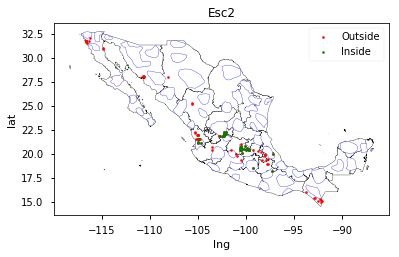

In [29]:
base = states.plot(color='white', edgecolor='black')
join = gpd.sjoin(df, loadzones, op='within')
#join = gpd.overlay(loadzones, df, how='intersection')
loadzones.plot(ax=base, color='white', edgecolor='blue', label='Loadzones')
df.plot(color='red', ax=base, label='Outside', markersize=5)
#join.plot(ax=base, color='green', legend=True)
join.plot(ax=base, color='green', label='Inside', markersize=5)
plt.title(name)
plt.xlabel('lng')
plt.ylabel('lat')
plt.legend();
#plt.savefig(name + '.png', dpi=300)

In [ ]:
from itertools import zip_longest

#join = gpd.sjoin(df, loadzones, op='within')
load_zones_out = loadzones[~loadzones['trans-region']
                          .isin(join['trans-region'].unique())]['trans-region']
load_zones_in = join.groupby('trans-region')['geometry'].count().index.values
#join = gpd.overlay(loadzones, df, how='intersection')
with open(name + '.txt', 'w') as fpd:
    fpd.write('Trans regions included:\t{0}\n'.format(len(join['trans-region'].unique())))
    fpd.write('Trans regions not included: \t{0}\n'
              .format(len(loadzones[~loadzones['trans-region']
                                    .isin(join['trans-region'].unique())])))
    fpd.write('Total points:\t{0}\n'.format(len(df)))
    fpd.write('Points inside:\t{0}\n'.format(len(join)))
    fpd.write('Points outside:\t{0}\n'.format(len(df) - len(join)))
    fpd.write('Trans_in\tTrans_out\n')
    for values in zip_longest(*[load_zones_in, load_zones_out]):
        fpd.write('{0}\t{1}\n'.format(values[0],values[1]))

In [ ]:
no_1 = gpd.sjoin(df, loadzones, op='within')

In [ ]:
grouped = no_1.groupby(['trans-region'])['ID'].count()

In [ ]:
grouped